<div style="text-align: right">Research in NLP, Summer 2022</div>
<div style="text-align: right">Dino Konstantopoulos, 12 May 2022</div>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import os
os.chdir("/content/gdrive/MyDrive/Northeastern Research/sentence_similarity")

Need to install `Rust`!
```
https://www.rust-lang.org/tools/install
```

Then upgrade both Transformer and huggingface_hub;
```
pip install -U transformers
pip install -U huggingface_hub
```

In [2]:
from zss import simple_distance, Node
import benepar
from collections import OrderedDict
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import spacy

d:\Anaconda3.5.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Anaconda3.5.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Anaconda3.5.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
d:\Anaconda3.5.1\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
nlp = spacy.load('en_core_web_sm')

In [3]:
benepar.download('benepar_en3')
nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))

[nltk_data] Downloading package benepar_en3 to
[nltk_data]     C:\Users\Dino\AppData\Roaming\nltk_data...
[nltk_data]   Package benepar_en3 is already up-to-date!


I cannot run the cell below because *someone* forgot to give me the data file!

In [ ]:
df = pd.read_csv('train.txt', sep='\t', 
                 names=['sentence1', 'sentence2', 'edit distance', 'norm 1', 'norm 2', 'cosine sim', 'label'])

So let's run `spacy`'s POS tags instead:

In [1]:
import sys, os, re, json
from collections import Counter, OrderedDict
import itertools
from numpy import *

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)


postags = []
for token in doc:
    postags.append(token.tag_)
print(postags)

Apple Apple PROPN NNP nsubj Xxxxx True False
is be AUX VBZ aux xx True True
looking look VERB VBG ROOT xxxx True False
at at ADP IN prep xx True True
buying buy VERB VBG pcomp xxxx True False
U.K. U.K. PROPN NNP compound X.X. False False
startup startup NOUN NN dobj xxxx True False
for for ADP IN prep xxx True True
$ $ SYM $ quantmod $ False False
1 1 NUM CD compound d False False
billion billion NUM CD pobj xxxx True False
['NNP', 'VBZ', 'VBG', 'IN', 'VBG', 'NNP', 'NN', 'IN', '$', 'CD', 'CD']


Every token is assigned a POS Tag in Spacy from the following list:

<table style="height:625px" width="699"><tbody><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr><tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr><tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr><tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr><tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr><tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr><tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr><tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr><tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr><tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr><tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr><tr><td>PART</td><td>particle</td><td>*’s, not,*</td></tr><tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr><tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr><tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr><tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr><tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), <img draggable="false" role="img" class="emoji" alt="😝" src="https://s.w.org/images/core/emoji/13.0.1/svg/1f61d.svg">*</td></tr><tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr><tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr><tr><td>SPACE</td><td>space</td></tr></tbody></table>

Passing the POS token attribute to Doc.count() function which returns a frequency dictionary with key as POS attribute value and its frequency as the value

In [5]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Counting the frequencies of different POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
print(POS_counts)

for k,v in sorted(POS_counts.items()):
    print(f'{k:{4}}. {doc.vocab[k].text:{5}}: {v}')

{90: 2, 84: 3, 92: 3, 100: 1, 85: 1, 94: 1, 97: 1}
  84. ADJ  : 3
  85. ADP  : 1
  90. DET  : 2
  92. NOUN : 3
  94. PART : 1
  97. PUNCT: 1
 100. VERB : 1


Passing the TAG token attribute to Doc.count() and returning a frequency dictionary with key as TAG attribute value and its frequency as the value

In [6]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Counting the frequencies of different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

print(TAG_counts)
for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

{15267657372422890137: 2, 10554686591937588953: 3, 15308085513773655218: 3, 17109001835818727656: 1, 1292078113972184607: 1, 74: 1, 12646065887601541794: 1}
74. POS : 1
1292078113972184607. IN  : 1
10554686591937588953. JJ  : 3
12646065887601541794. .   : 1
15267657372422890137. DT  : 2
15308085513773655218. NN  : 3
17109001835818727656. VBD : 1


Visualizing the part-of-speech tags and syntactic dependencies

In [54]:
from spacy import displacy

doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")
displacy.serve(doc, style="dep")

d:\Anaconda3.5.1\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


In [8]:
nlp = spacy.load("en_core_web_sm")
text = "Life is a beautiful journey that is meant to be embraced to the fullest every day.However, that doesn’t mean you always wake up ready to seize the day, and sometimes need a reminder that life is a great gift."
doc = nlp(text)
sentence_spans = list(doc.sents)
displacy.serve(sentence_spans, style="dep")

d:\Anaconda3.5.1\lib\runpy.py:193: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  "__main__", mod_spec)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


Caring only about the POS tags and not about sentence structure:

In [56]:
def pos_lists(s1, s2):
    
    doc1 = nlp(s1)
    doc2 = nlp(s2)

    postags1 = []
    for token in doc1:
        postags1.append(token.tag_)

    postags2 = []
    for token in doc2:
        postags2.append(token.tag_)

    return postags1, postags2

In [57]:
pos_lists("I would like a cup of tea", "I would also like a cup of tea too")

(['PRP', 'MD', 'VB', 'DT', 'NN', 'IN', 'NN'],
 ['PRP', 'MD', 'RB', 'VB', 'DT', 'NN', 'IN', 'NN', 'RB'])

In [58]:
pos_lists("I would like a cup of tea", "They all would very much like some blah blah blah ...")

(['PRP', 'MD', 'VB', 'DT', 'NN', 'IN', 'NN'],
 ['PRP', 'DT', 'MD', 'RB', 'RB', 'IN', 'DT', 'UH', 'UH', 'UH', '.'])

In [59]:
pos_lists( "I would like a cup of tea", "I, wanting to quench my thirst, would also like a cup of tea")

(['PRP', 'MD', 'VB', 'DT', 'NN', 'IN', 'NN'],
 ['PRP',
  ',',
  'VBG',
  'TO',
  'VB',
  'PRP$',
  'NN',
  ',',
  'MD',
  'RB',
  'VB',
  'DT',
  'NN',
  'IN',
  'NN'])

In [60]:
pos_lists("Read my lips: No new taxes", "And since we've got no place to go, let it snow, let it snow, let it snow")

(['VB', 'PRP$', 'NNS', ':', 'DT', 'JJ', 'NNS'],
 ['CC',
  'IN',
  'PRP',
  'VB',
  'VBN',
  'DT',
  'NN',
  'TO',
  'VB',
  ',',
  'VB',
  'PRP',
  'VB',
  ',',
  'VB',
  'PRP',
  'VB',
  ',',
  'VB',
  'PRP',
  'VB'])

"*Distance*" between comparable sentences using a shallow tree structure:

In [61]:
from zss import simple_distance, Node

def distance(s1, s2):
    
    doc1 = nlp(s1)
    doc2 = nlp(s2)

    postags1 = []
    for token in doc1:
        postags1.append(token.tag_)

    postags2 = []
    for token in doc2:
        postags2.append(token.tag_)

    #return postags1, postags2
    
    #A = (
    #Node("f")
    #    .addkid(Node("a")
    #        .addkid(Node("h"))
    #        .addkid(Node("c")
    #            .addkid(Node("l"))))
    #    .addkid(Node("e"))
    #)
    
    A = Node("f")
    for p in postags1:
        A = A.addkid(Node(p))
        
    B = Node("f")
    for p in postags2:
        B = B.addkid(Node(p))
        
    return simple_distance(A, B)

In [62]:
pos_lists("I would like a cup of tea", "I would like a cup of coke")

(['PRP', 'MD', 'VB', 'DT', 'NN', 'IN', 'NN'],
 ['PRP', 'MD', 'VB', 'DT', 'NN', 'IN', 'NN'])

In [63]:
distance("I would like a cup of tea", "I would like a cup of coke")

0.0

In [64]:
distance("I would like a cup of tea", "I would also like a cup of tea too")

2.0

In [65]:
distance("I would like a cup of tea", "They all would very much like some blah blah blah ...")

8.0

In [66]:
distance("Read my lips: No new taxes", "And since we've got no place to go, let it snow, let it snow, let it snow")

20.0

# Semantics

In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('stsb-roberta-large')

The raw data:

In [2]:
raw = [
 'Water Nozzles & Hose Adapters\n',
 'I love to see a girl having fun with produce.\n',
 'We present sexy twinks XXX movies!\n',
 'right on your computer screen.\n',
 'and it works just like the Pay-Per-View on your\n',
 'thousands of other adult movies that are on-line.\n',
 'Copyright 1998- Sexycatlive.com, All Rights\n',
 'donations and also help spread the word about this organization on to your friends and family.\n',
 '2011-12-06 - URBANLOOK - NEW FACE FOR FASHION\n',
 '\xc2\xa9 Sunset Chevrolet Buick GMC.\n',
 'Car Dealer Website Powered by Liquid Motors\n',
 'Possibly related posts: (automatically generated)\n',
 'The Andaman Sea - Most of the diving off the western flank of the isthmus is based around the southern beach resorts of Phuket, Krabi, and Ko Phi Phi.\n',
 'The three-dives-in-a-day outings include the triad of Shark Point, Anemone Reef, and the Ko Phi Phi National Marine Park and prove most popular.\n',
 'Teeming with schools of reef fish in every stripe and hue, "Shark Point" is the most often visited site in the area and was named after the leopard sharks often spotted on the sea floor.\n',
 'FOR MORE INFORMATION PLEASE VISIT THE TOURISM AUTHORITY OF THAILAND\n',
 'How to Release Stress - Meditation Classes\n',
 "There are different things that you'll notice while meditating:\xc3\x82\xc2\xa0 anxiety, irritability and other negative emotions will be diminished.\n",
 "You'll feel better and centered.\n",
 'The first word, "B\'reisheit" instructs us that we should be looking for the "reisheit" that is "in" the Torah.\n',
 'Of every jot, tittle, letter, word, phrase, sentence, verse, narrative, portion, and book, the Torah instructs us to inquiring of it, "what does this have to do with the "reisheit," the first word of the Torah.\n',
 "Listen, my son, to your father's instruction and do not forsake your mother's Torah.\n",
 'February 19, 2009 at 12:21 am\n',
 'What HaShem gave to Moshe was the Tablets, The Torah, and the Commandment for their instruction.\n',
 'The "Commandment" for their instruction refers to the understanding of each mitzvah of "The Torah" and the "Tablets."\n',
 'This understanding was not written down.\n',
 'It is the glory of G-d to conceal a matter; to search out a matter is the glory of kings .\n',
 'Bringing non-sucky advice to beautiful people like YOU since 2011!\n',
 'Assassin\'s Creed Brotherhood Ezio Costume - Completed finally finished my assassins creed brotherhood: "wetland ebony" version of...\n',
 'VVBC: SEXY COSTUME CONTEST PROMO CLIP - VBConline.Tv\n',
 'Free WordPress Themes | Free Web Space\n',
 'Carolina Tar Heel Blue " UNC Football The Blog For All UNC Sports Fans Carolina Football Recruiting Class It shows on ESPN that the Tarheels have the 25th best recruiting class in the nation.\n',
 'Might not sound that great, but compared to the schools in front of it, I\xe2\x80\x99d say its an accompolishment.\xc2\xa0According to ESPN, Carolina has signed on two ESPN 150 players.\n',
 "Of their 21 signings 5 are four star players and More > UNC Football Turnovers Dash UNC Hopes in 31-30 Meineke Bowl Loss to WVa Recap of West Virginia's 31-30 bowl game victory over UNC, courtesy of UNC's two fourth-quarter turnovers.\n",
 'ACC Football UNC Athletics UNC Football ACC Big East Big East Football Meineke Car Care Bowl UNC West Virginia West Virginia Football Excitement Builds for UNC - WVA Bowl Game Preview of the UNC - WVA bowl game taking place on Saturday, Dec.\n',
 'North Carolina looks to take the next step in advancing from a lower-tier ACC team to a perennial contender.\n',
 'UNC Athletics UNC Football ACC Football Big East Football Bill Stewart Butch Davis UNC West Virginia Football\n',
 'The hottest glamour babes on the internet!\n',
 'Check out what our friends at Art Lingerie sent us this morning.....\n',
 'This hot little brunette out in the woods wearing nothing but sexy white stockings and high heels....\n',
 'Why is that defenseless women half naked in the woods always turn us on?\n',
 'If you say you believe, yet you will not follow Jesus, you, in fact,\n',
 'BECAUSE OF UNBELIEF THEY WERE BROKEN OFF (they were cut off from\n',
 'We are to SERVE THE LORD WITH FEAR, AND REJOICE WITH TREMBLING .\n',
 'the Lord, and are you working for Him?\n',
 'These Scriptures are showing us how to\n',
 'MAN IS HE THAT FEARETH THE LORD?\n',
 'HIM SHALL HE TEACH IN THE WAY THAT HE SHALL\n',
 'We see this in several instances, such\n',
 "Indeed, God's wrath may come upon us if we do not humble ourselves\n",
 'then we can know (have complete faith) that our prayer is answered; it is as\n',
 'We must study the Bible and act on it.\n',
 'This should be the first priority\n',
 'in your Bible for the entire time.\n',
 "Study God's Word, pray, and fast for at least\n",
 'THE CHILD WAS CURED FROM THAT VERY HOUR.\n',
 'THEN CAME THE DISCIPLES TO JESUS APART,\n',
 'It cannot be done "your" way.\n',
 'MOREOVER WHEN YE FAST, BE NOT, AS THE HYPOCRITES, OF A SAD COUNTENANCE:\n',
 'If we do not do this, our prayers will\n',
 'We only need to study parts of it," is not faith.\n',
 'these things"; the Tribulation?\n',
 'You are called to live a holy life.\n',
 'We can ask God to hinder Satan from interfering in letting them make their\n',
 'God says, LET YOUR SPEECH BE ALWAY WITH GRACE, SEASONED WITH SALT,\n',
 'SERPENTS, AND HARMLESS AS DOVES-Mt 10:16.\n',
 'AND HE SAITH UNTO THEM, FOLLOW ME,\n',
 'Our words have no power to convict anyone of anything.\n',
 "not teach directly in line with God's Word , find one that\n",
 'FOR YE ARE LIKE UNTO WHITED SEPULCHRES, WHICH INDEED APPEAR BEAUTIFUL\n',
 'Many are the religious leaders of today that are included, just\n',
 'ME WITH STRENGTH IN MY SOUL-Ps 138:3.\n',
 'SAVE THY PEOPLE, AND BLESS THINE INHERITANCE: FEED THEM ALSO,\n',
 "You should act on God's Word and believe you have received even as\n",
 'PRAYED FOR THEM, THAT THEY MIGHT RECEIVE THE HOLY GHOST-Acts 8:15.\n',
 'THAT WE MAY LEAD A QUIET AND PEACEABLE LIFE IN ALL GODLINESS AND HONESTY.\n',
 'THING THAT THEY SHALL ASK, IT SHALL BE DONE FOR THEM OF MY FATHER WHICH IS IN\n',
 'IF HE WILL NOT HEAR THEE, THEN TAKE WITH THEE ONE OR TWO MORE, THAT IN THE MOUTH\n',
 'OF TWO OR THREE WITNESSES EVERY WORD MAY BE ESTABLISHED.\n',
 'falls on Jesus, as you are doing it to Him?\n',
 'YEA, THINE OWN LIPS TESTIFY AGAINST THEE-Job 15:4-6.\n',
 'THOU ART SNARED WITH THE WORDS OF THY MOUTH ,\n',
 'MURDERS, ADULTERIES, FORNICATIONS, THEFTS, FALSE WITNESS, BLASPHEMIES-Mt 15:18,19.\n',
 'AND WE TURN ABOUT THEIR WHOLE BODY.\n',
 'BEHOLD ALSO THE SHIPS, WHICH THOUGH THEY\n',
 'All our good works, all our labors are in vain if we do not go\n',
 "you want your prayers answered, you must be in God's will; you must be living\n",
 'In the Ten Commandments we read, THOU SHALT NOT TAKE THE NAME\n',
 'The Bible shows us, if you love Me you will keep My commandments -ref\n',
 'This entry was posted in Being an Expat .\n',
 'In as little as a few minutes you can learn how much money you can get in your possession to handle problematic bills when you get started on your auto title loan.\n',
 "When you've been turned down for a loan elsewhere, you'll see a car title loan in Santa Monica is the way to go.\n",
 "With this sort of minimal requirements, you don't have to leap through hoops.\n",
 'A car title loan allows you to relax and not have financial difficulties on your mind.\n',
 'Four Cups....of milk??!!: Pesachim 99b\n',
 'Daven for your Beautiful Esrog TODAY!!!\n',
 'Ethics of the Fathers: Chapter 4 Mishnah 6 (1-3)\n',
 'SUMMARY: Ethics of the Fathers: Chapter 4 7 (1-4)\n',
 'Involve Yourself With Torah (Avoid Your Yetzer Hara)\n',
 'Righteousness, righteousness you shall pursue!!\n',
 "Don't Say Hashem was Guilty of transgressing Bal Talin\n",
 'Why the repetition we get the point already!!!\n',
 'Yirmiyah 43-48 and living in Egypt\n',
 'Archives: View Previous Newsletters\n',
 'Have you seen the style of facebook groups?\n',
 'You can now add a 200\xc3\x97800 px banner that reflects your group.\n',
 'Here is the one I made for our German Spouses in the US Military Group.\n',
 'And here is a similar one for your timeline.\n',
 'If you are a German Spouse of a Military service... read more "\n',
 'Coming out of the Closet The Fossil Key Per Tote\n',
 'Vanilla Easter Braid Bread - Osterzopf\n',
 '"For me, there are two principle differences - the approach and the aftermath.\n',
 'Regarding the approach, there is an embedded collaboration in coaching which engages a client more than a top down approach.\n',
 'When it comes to the aftermath, often there is a furlough at the end of training but coaching walks with the client/trainee through the changes - that follow-up piece is critical for change sticking."\n',
 'inspectors any more latitude.\n',
 'This is the third and final pass\n',
 'planet configuration, the square (90 degree aspect) between\n',
 'The International Monetary Fund (IMF) will be replenished\n',
 'easily win over Al Gore in the next Presidential race.\n',
 'Bill Clinton than he does with his father.\n',
 'intellectual and persuasive powers, but at its worst can\n',
 'It is especially design for outdoor networking facility\n',
 'Accelerated PPH processing at the HIPO (Hungarian Intellectual Property Office)\n',
 'Home \xe2\x80\xba Programs \xe2\x80\xba Junior and Senior High\n',
 'Adventure School (MAS) \xe2\x80\xba Media Gallery \xe2\x80\xba \xe2\x80\xba\n',
 'Digital Cameras, Video Cameras & Camera Accessories, All Available Here!\n',
 'UNDERWATER Digital Camera: CAPTURING MOMENTS UNDERWATER\n',
 'If you are shooting with your underwater digital camera, you need to take note of a few things to help you come up with the best images underwater.\n',
 'Home | About us | Events | We Buy | Mailing List | Links | Contact Us\n',
 'Website & Outreach: Christine Barry\n',
 'Copyright \xc2\xa9 2012 Shiawassee Dems - All Rights Reserved Powered by WordPress & Atahualpa\n',
 'Ganoderma Enriched-Coffee-Tea-Supplements-Cocoa-Mocca-Schokolade\n',
 'Check Out The Documented Medical Information\n',
 'The Best GanoDerma Lucidum, Buy It Here\n',
 'Gyal Wa Nyame Sherab Gyaltsen is the founder of Menri Monastery.\n',
 'He is the second most important Tonpa of the Bon in this era.\n',
 'The Menopause Support Programme covers\n',
 'It is important to ensure continued support for graduating students and so we have set up a dedicated 2008 Student Scholarship Fund to help our 2008 graduates maintain their education under our supervision.\n',
 'A07-Full Zip Hooded Sweatshirt\n',
 "Lots of things happening around here...With this site being the most obvious of new things!\xc2\xa0 I won't be updating the blogspot page anymore - So, if you want to know about new work and upcoming projects you'll have to check back here.\n",
 'Tweets that mention Inside the Style Council | Jillian Villafane -- Topsy.com on Inside the Style Council\n',
 'Travelling to Sofia International Airport\n',
 'Airlines flying from Sofia International Airport\n',
 'One of many human challenges is that we identify with our bodies, and our thoughts and feelings as the ultimate truth of who we really are.\n',
 'We are that which has a body; we that which possesses and creates thoughts and feelings but we are not these things.\n',
 'We came to believe that our value is defined by the external.\n',
 'You can start to adjust the floor plan and design it to fit the style you originally selected when you have a rough floor plan.\n',
 "Home \xc2\xa0>\xc2\xa0 BLOG \xc2\xa0>\xc2\xa0 Digital \xc2\xa0>\xc2\xa0 Improve your site's ranking\n",
 'Niche Social Media Communities\n',
 'In our last blog entry, 10 tips on optimising online press release distributions , we listed websites where you can upload your press releases with live links back to your website.\n',
 'Here, we list the more popular online article directories where you can upload your B2B articles, which also allow live links back to your website.\n',
 '\xe2\x80\xa2 Non-Latin domain names for B2B websites\n',
 '\xe2\x80\xa2 Q&A: Pros and Cons of online research\n',
 'Raw Power in its entirety captured live in September 2010 at All Tomorrows Parties.\n',
 'I was lucky enough to see the Stooges play Chicago a few months ago, and if this disc captures even half the intensity ...\n',
 'Tagged Iggy Pop , The Stooges\n',
 'I do not think that you will have any problem in finding cheap accommodation in Coober Pedy.\n',
 'It is really small place and you cannot expect hotels with five stars there.\n',
 'You do not have to prepare anything early.\n',
 'You can find good hotel when you get there.\n',
 'Even though you do not want to spend money you should find a good hotel.\n',
 'Mark my words ~ Eat well three times a day at virginia bed and breakfast\n',
 'You can vote in polls in this forum\n',
 "men's watches |women's watches |jewellery rings |jewellery pendants |jewellery necklaces |jewellery bracelets |jewellery earrings \xc2\xa9 CopyRight Like Bracelets 2010-2012 RunTime:0.988308\n",
 'No items matching your keywords were found.\n',
 'Michelle Obama and Jill Biden booed at NASCAR\n',
 'Hereford United Childrens Replica Shirts\n',
 'Hereford United Mens Leisurewear\n',
 'Hereford United Coaching at John Kyrle High School Ross\n',
 'University College Dublin Ladies Boat Club\n',
 'Dutch cemetery location and photography, for more information about graveyard service go to the English part.\n',
 'Jewish graveyards, go to this link.\n',
 'Also photos of graveyards all over the world.\n',
 'Defy Age Management Exfoliator\n',
 'I brought Easy Writer Magic Board for my 3 year old kid.\n',
 'He is very much happy with his new slate.\n',
 'The advantage of this slate is no need of pysical...\n',
 'World Judo Championships TOKYO 2010 at Yoyogi National Gymnasium from 9th to 13th September 2010\n',
 'Jewelry Trends Spring/Summer 2012\n',
 'There have been separate typecasts of baby eczemas therein overlarge pieces of babies have been infested by atopic baby eczemas.\n',
 'Atopic eczema is endemic as well as goes upon during 2-3 months of aged age.\n',
 'The name Atopic relates to an oversensitivity of resistant complement of passive when it responds to a unfamiliar environs.\n',
 "Nevertheless you can't discuss it which at your convenience opposite family members have been trouble from a relations diseases such as asthma conflict or luxuriously heat as well as afterwards only a baby is starting to be impacted by baby eczema.\n",
 "Dr. Barbara Levine outlines how we can save income but sacrificing any elements of your baby's illness in difficult mercantile times.\n",
 'Healthy Women Healthy Families: Prenatal Health\n',
 'Metallurgy - . (of a metal) treated so as to impart impassivity.\n',
 'Statusuri Haioase 90 " I\'m mobile ca n-am pc... "\n',
 'On August 1st, 2008, anonim said:\n',
 'On January 10th, 2009, gabriela said:\n',
 'On August 13th, 2009, stefanel said:\n',
 'ee jale cu sts-urile voastre dativa dreq foc\n',
 'Categories: Business Opportunity | Tags: Best , Cell , Mobile , Phone , Plan. | 10 Comments "\n',
 'Comments for Boston Boudoir Photography Comment on A Bombshell Birthday | Boston Boudoir Photographer by Lloyd - Edmonton Intimate Boudoir Photography Hi Laura!\n',
 "I just adore the smile on photo 2; it's lovely.\n",
 'Looking forward to seeing more.\n',
 "I just adore the smile on photo 2; it's lovely.\n",
 'Looking forward to seeing more.\n',
 "Comment on A Cool Email by Rob Oresteen Laura - congrats on the new boudoir site....I'm sure it will be a big hit and soon as Boston knows about it, you won't have time to do anything else!\n",
 "Laura - congrats on the new boudoir site....I'm sure it will be a big hit and soon as Boston knows about it, you won't have time to do anything else!\n",
 "Comment on Make It A Sexy Valentine's Day by tallee i would love to book for valentine day session.. i would love to book for valentine day session..\n",
 "I found this 'Icecream Loot Tag - Each' and thought that you may be interested.\n",
 'Me To You - Kolekce SKETCHBOOK\n',
 'Drive, Class 2A, Fully Threaded, indented head, the washer provides a large, flat bearing surface\n',
 'Credit Card Debt Consolidation\n',
 'search of things that made you feel good about yourself.\n',
 'the persons in whom you come in contact, become victim of oversight?\n',
 'As reported in the Los Angeles Times , the\n',
 'What does all this mean to you?\n',
 'please visit www.rigsbee.com/downloadaccess.htm .\n',
 'March 2012 Chapter Meeting: Relationship Marketing for Your ...\n',
 'published: 2005-01-18 10:02:56\n',
 'Star Wars Basic Figure:Count Dooku The former Jedi is in league with the Trade Federation and cyborg General Grievous to propel his galaxy-wide revolt.\n',
 'Dooku communicates with his allies via a hologram transmission to coordinate the next steps in his quest to overthrow the Republic.\n',
 'Shortages , Strobe Light , Strobe Lights , Tethers , Worlds Smallest Rc Helicopter\n',
 'Thomas & Friends Island of Sodor Wooden Play Table\n',
 'Kids Toy Chests Storage Discount\n',
 'DELUXE MILITARY DIE CAST TOY TANKS - 3 PIECE SET\n',
 'Industrial Safety Equipment Supply\n',
 'Hourly updated report the most gifted in toys.\n',
 'Princess Cut Diamond Engagement Rings - You will find almost as numerous ways to style princess cut diamond wedding rings to create it unique and appearance personalized.\n',
 'Trayvon Martin Witness Believes "He Intended for This Kid to Die"\n',
 '-EU trade chief says EU, ECB drawing up contingency plans in case of Greek exit -De Gucht urges Greece to stick to path of reforms and remain in Euro -No risk of contagion to rest of the Euro-zone if Greece leaves, De Gucht says (Adds spokeswoman denying plans under way, recasts to conform) BRUSSELS (Dow [...]\n',
 'Court suspends Ratko Mladic war crimes trial\n',
 'filter:alpha (opacity=100);opacity:1} .cnn_html_slideshow_media_caption a,.cnn_html_slideshow_media_caption a:visited,.cnn_html_slideshow_media_caption a:link,.captionText a,.captionText a:visited,.captiontext a:link{color:outline:medium none} .cnnVerticalGalleryPhoto{margin:0 auto;padding-right:68\n',
 'Congress Decries $800M in Unused Federal Grants\n',
 "O Holy night, the stars are brightly shining It is the night of our dear Savior's birth Long lay the world in sin and error pining Til He appeared and the soul felt it's worth A thrill of hope the weary world rejoyces For yonder breaks a new and glorious morn Fall on your knees O hear the angel voices O night divine!\n",
 'O night when Christ was born O night divine!\n',
 'And in His Name, all oppression shall cease Sweet hymns of joy in grateful chorus raise we Let all within us praise his holy name Christ is the\n',
 'All tours are led by fully qualified Blue and Green Badge Guides.\n',
 'The gallery opened in 1992 with just 100 pictures, it now displays over 1,000...\n',
 'We welcome you to click on the Availability\xc2\xa0link on each individually owned condo.\n',
 'Sunset Resort Rentals \xc2\xa0offer the best of both worlds.\xc2\xa0 We provide the personal service that you would expect from a Rental\n',
 'and boats are readied for the next outing.\n',
 'holiday at www.SunsetResortRentals.com\n',
 'Site Map | About Us | Customer Service | Return Policy | Browse | Privacy Policy | Unique Garden Decor Home\n',
 '2012\xc2\xa0Unique Garden Decor.\xc2\xa0All rights reserved.\n',
 'The West Peoria Plan Commission meets the\xc2\xa03rd Tuesday of\xc2\xa0every month from 5:30 p.m. - 6:30 p.m. at City Hall.\n',
 'in Beverly Hills or California medical office careers?\n',
 'You will recieve an access code from our computer.\n',
 'Enter the recieved access code below and press "ENTER "\n',
 'What is the role of collaborative law in a custody/visitation?\n',
 "Can I open my spouse's mail, including email?\n",
 'You want to have a circuit base training.\n',
 'Jumping from one exercise to another that is time based and not rep based.\n',
 'With these exercises, you should be thinking speed that requires explosive movements.\n',
 'The idea is to go from one exercise to another in a way that will increase your...\n',
 'Whether your goals are to increase your speed when you sprint or to melt the fat from your body, this sprint training program will help you in both areas.\n',
 'Disclosure | Terms of Use & Disclaimer | Privacy Policy\n',
 'Lifestyle Choices and Subcultures\n',
 "Special press review 'Bank client confidentiality' and Swiss financial Place\n",
 'Report on international financial and tax matters 2011\n',
 'Le secret bancaire: quel avenir ?\n',
 'While it is true that many girls will often sit around and gossip about the guys they all know, so do the guys, but its not very likely that they will want to hear about that hot chick sitting across the bar from you, or have you leering at her either.\n',
 "When a woman is with you, she wants to be the one you're thinking about and she doesn't want to hear all about your ex girlfriends, even if you are being negative about them.\n",
 "The only thing this tells her is that you're still obsessed and upset about them.\n",
 "Girls don't want to feel like you're settling; they want to think that you're really interested in them.\n",
 "Another thing you need to know...while girls think that a ruggedly handsome guy can pull off the slightly scruffy look...occasionally...you probably cannot while dating, so please don't try.\n",
 'Put on a clean shirt, wash your hair and face and smell good.\n',
 'Girls want to see that you have put some effort out there to look good because you were going to see them.\n',
 'You can bet they have just been to a bit of trouble in the bathroom!\n',
 'Plus, they want to know that no matter what, they can go into a public place with you, there new date and not be embarrassed by how you might turn up and look.\n',
 'Snowball Launchers, Giant-pumpkin Growers, And Other Cool Contraptions ...More\n',
 'Basto - Again and Again (DJ Solovey Boty Mix) (4:39) 2.\n',
 'Nicki Minaj - Turn Me On (Yanis.S Remix) (4:35) 3.\n',
 'Dream Dance Alliance - Frozen (Extended Female Mix) (5:56) 4.\n',
 "Kylie Minogue - Can't Get You Out Of My Head (Dj Amor Remix) (5:37) 5.\n",
 "Navi G. - Nothing You Can Do (AivaR & N'Lezzon Remix) (3:52) 6.\n",
 'One-T & Cool-T - The Magic Key (Slayback Remix) (5:58) 7.\n',
 "Home:: Blog:: Produce:: Other Products:: What's Ripe:: Recipes:: Facts:: Shop:: About:: Directions:: Newsletter:: Contact:: Sitemap\n",
 'What do you do as a driver instructor?\n',
 'Costume Includes Dress and Hat.\n',
 'We accept all major Credit and Debit Cards as well as PayPal Payments.\n',
 'Visa and MasterCards are verified to give you added security .\n',
 'There are no divorce laws in the Philippines so the sanctity of marriage is held in high regard.\n',
 'With divorce being unacceptable, a wife will give top priority to the stability of her marriage and family.\n',
 'Women are quite willing to sacrifice their careers for this sake.\n',
 'How To Impress A Girl Who Is Special\n',
 'Dating Married Women Brings You A Roller Coaster Ride\n',
 'American Isagenix Distributors:\n',
 'Where to Buy Isagenix in Arkansas\n',
 'Where to Buy Isagenix in Louisiana\n',
 'I have been in a relationsh ip with my girlfriend for four years on and off, and through a lot of cheating, lies and now a pregnancy we have managed to work everything out.\n',
 "But lately I feel like Im doing everything wrong, I know I've lied in the [...]\n",
 'so can you please tell me any other algorithm for finger detection.\n',
 'Memory leaking debugging errors\n',
 'HIGHGUI ERROR: V4L: index 0 is not correct\n',
 'CTS Outdoor, 52 Series Large Grenades\n',
 'BLUE Big Book (Hardback) Cover with Serenity Prayer & Medallion Holder\n',
 'Satellite-Interception Tactical\n',
 '2 Responses to "Marathoning For Mortals"\n',
 'Having fun with friends on my deck\n',
 'through these terms and conditions carefully before using this website and\n',
 'reserve the right to change these terms and conditions at any time.\n',
 'orders that you place on this website will be subject to acceptance in\n',
 'of your order and the completion of the contract between you and us will\n',
 'will inform you as soon as possible and give you the options of either\n',
 'the products provided that we have processed and received payment in full\n',
 'any losses caused as a result of unauthorised access to information\n',
 'with our internal security policy and the law.\n',
 'temporarily stored on your computer.\n',
 'A session cookie is also called a\n',
 'X-Men Origins: Wolverine (2009)\n',
 'When Kermit and the gang cause three letters on their way to Santa Claus to go missing, the troupe is tasked with saving Christmas for the letter-writers.\n',
 'Excellent stud, one of the most sought after in the world.\n',
 "all the extra's and then some!\n",
 'She is the daughter of V16 Campino von der Piste Trophe,\n',
 'thanks Johnnie f. looks like i screwed up was hoping to visit Loas. never mind next time\n',
 'Anyone who goes to a psychiatrist should have his head examined.\n',
 '" Reply #5 on: November 19, 2011, 08:48:19 PM "\n',
 'In vogue Unstinting Software Is To each These Days\n',
 'Sales & Marketing Consultants\n',
 'Hammacher Schlemmer discount for up to a 45% discount.\n',
 'New promotional coupon codes & coupons\n',
 'Definitive Guide to Making Money Online - Fast!\n',
 'August 29th, 2011 - General Internet Marketing , affiliate marketing\n',
 'We have all to a certain degree been touched by the progress of social network sites and Facebook has now come to be the market leader.\n',
 'Six million users could turn out to be one billion in the not too distant future if you consider it was only 2004 when this all began.\n',
 'This kind of growth is impossible to ignore when contemplating the marketing potential of such an enormous global audience and big businesses are already using this to market their brands.\n',
 'There are those that declare this is now essential for success on the internet and we will study this in greater detail.\n',
 'You must be a logged-in member to vote\n',
 'Script Executed in 0.1412 seconds\n',
 'Through what I\xc2\xa0can feel is a\xc2\xa0great effort of will, your eyes regain their focus on me and a\xc2\xa0muf\xc2\xadfled "mmmh-uh" is all that escapes you.\n',
 'I\xc2\xa0speak in a\xc2\xa0sur\xc2\xadpris\xc2\xadingly even voice con\xc2\xadsid\xc2\xader\xc2\xading my pent-up desire for you.\n',
 'Your eyes and mouth snap open, star\xc2\xadtled, and your body starts shak\xc2\xading.\n',
 'As I\xc2\xa0cover your lips with mine you twist your face in a\xc2\xa0mix\xc2\xadture of plea\xc2\xadsure and pain, let\xc2\xadting out a\xc2\xa0plain\xc2\xadtive, wail\xc2\xading scream into my lungs.\n',
 'I\xc2\xa0hold you like that while your body thrash and your arms flail and you are com\xc2\xading and falling deeper and deeper into dark\xc2\xadness.\n',
 'As you come, I\xc2\xa0twist and turn your nip\xc2\xadple, I\xc2\xa0rel\xc2\xadish in my inner sadist and I\xc2\xa0do every\xc2\xadthing I\xc2\xa0can to fuel the fiery cords of light I\xc2\xa0imag\xc2\xadine I\xc2\xa0can see between your nip\xc2\xadple and your clit and your\xc2\xa0heart.\n',
 'Love let\xc2\xadters: The third day (Or the calm before the\xc2\xa0storm)\n',
 'My Love, \xc2\xa0 I am not good at all with the spoken word.\xc2\xa0 The language of my heart comes only through my writing so I write you this in hopes to express to you the meaning you have in my life.\xc2\xa0\xc2\xa0 When I met you, I had no idea that you were to be the [...]\n',
 'Dreamwalker asked me the other day when I asked him how much he loved me....How can I quantify love?\xc2\xa0 It got me to thinking what is love really, how do you explain it in words?\n',
 'He was so right.\xc2\xa0 There is no way to express love in words.\n',
 'Love is so many things and he [...]\n',
 'Training: I get a little rush of blood to the head on Tuesdays.\xc2\xa0 Tuesdays is the day I submit my weekly assignment.\n',
 "Am I Still A Submiss...: It's been a while since I've written anything here.\n",
 "I haven't really had the mind to do so, but here lately...\n",
 'Kelseyville Unified School District\n',
 'Lakeport Unified School District\n',
 'Upper Lake Union Elementary School\n',
 'Introduction to Mathematics Common Core: Grades 7-8\n',
 'Mr. Drummond provides legal advise regarding issues of school law, and government law, including but not limited to administrative hearings, arbitrations, bilingual education, the Brown Act, CEQA, charter schools, child abuse, collective bargaining, competitive bidding, conflict of interest, constitutional law, contracts, copyright infringement, curriculum, developer fees, elections, eminent domain, employment law, employment discrimination law, Field Act, general plan, grievances, legislation, litigation defense, NCLB, school finance, grant applications, prevailing wage, public school construction, real property matters, redevelopment, special education, student rights, student expulsions, tort claims, tort liability, waivers, and zoning.\n',
 'Tercel Eyas 1200mm Panel End Rectangular Desk\n',
 ', Processed in 0.047988 second (s), 21 queries\n',
 "persecutions, God's wrath, hell and the lake of fire, sin, the Revelation and\n",
 'Regarding America and the more\n',
 'WOULD BE LIKE WITHIN THEMSELVES\n',
 'by the Moslems, during the Middle Ages, and abandoned; its desolate ruins remain\n',
 'They do not have on the white garments of\n',
 'righteousness, but are clothed with the black wool of deceit, which is no clothing\n',
 'This church is shown to be naked, but they do not know these things.\n',
 'It is a church age for laughing rather than for crying.\n',
 'They love the praise of men more than the praise of God.\n',
 'to do all manner of things, but does not find time to humbly dwell in and study\n',
 'It is the church age when thousands\n',
 'and deceptions of the Laodicean age with them to the mission field and further\n',
 'Their confidence is so deeply rooted that it is nearly impossible\n',
 'the doctrine of perfection and holiness.\n',
 'Their thoughts are divided between\n',
 'being taught in Laodicea; however, it was rejected.\n',
 'considered itself rich and increased with goods.\n',
 'that sees itself as a good and spiritually sound institution with no needs.\n',
 'staff, and in volunteer workers.\n',
 'Never in church history has there been so many\n',
 "and what is in the people's hearts .\n",
 'that hears lukewarm preaching and comes away empty and unfulfilled, yet is in\n',
 'such darkness that it is content; it does not even know it is wretched.\n',
 'word appears only one other time in the New Testament.\n',
 'understanding the Word of God.\n',
 'They are not zealous for the truth.\n',
 'Following Rev 3:22, there should\n',
 'The last church age would be wretched, miserable, poor, blind,\n',
 'People would be willingly ignorant of the truth.\n',
 'People would forget that the world was destroyed by water.\n',
 'Scriptures reflect no revival, but rather people being greatly deceived.\n',
 'People would have an outer form of godliness but denying Jesus.\n',
 'Scriptures reflect no revival.\n',
 'Rather they portray the clergy becoming more\n',
 'People would despise those that do good.\n',
 'Women would be weak-willed in resisting sin (including sex).\n',
 'People would try to cause divisions between the saints.\n',
 'People would still be giving away their offspring to be married.\n',
 'People would be buying things, as if nothing was going to happen.\n',
 'These picture people that are so corrupt that they do not even hide\n',
 'Is the statement that a great\n',
 'Those that do get saved, during that horrible time, can expect to flee for their\n',
 '(or I have acquired wealth-NIV), AND HAVE NEED OF NOTHING; AND KNOWEST NOT THAT\n',
 'IF ANY MAN HEAR MY VOICE, AND OPEN THE DOOR, I WILL COME IN TO HIM, AND WILL\n',
 "Shares of RIM's Playbook Make Melt Destroy\n",
 "S7 is designed different from our competitors, so the S7 is not a tablet PC works only Android but he's also there is also a function of his phone.\n"
]

In [4]:
# creating our word dictionary
words = set()
for s in raw:
    sentence_words = s.split()
    for w in sentence_words:
        words.add(w)
    
len(words)

2513

# Syntax tree
Last meeting, our backend team showed interesting work: They translated a POS parse tree into vector embeddings so that we can compute a cosine similarity between an incoming sentence and reference (corpus) sentences.

But they explained nothing and even left out a file for the professor to go on wild goose chase about.
<br />
<left>
<img src="ipynb.images/wild-goose-chase.gif" width=400 />
</left>

So today professor explains this to you in a little clearer fashion :-)

Here's how to build a sentence syntax tree with the [Berkeley](https://pypi.org/project/benepar/) parser:

In [67]:
import benepar, spacy, huggingface_hub
nlp = spacy.load('en_core_web_sm')
if spacy.__version__.startswith('2'):
    nlp.add_pipe(benepar.BeneparComponent("benepar_en3"))
else:
    nlp.add_pipe("benepar", config={"model": "benepar_en3"})
doc = nlp("The time for action is now. It's never too late to do something.")
sent = list(doc.sents)[0]
print(sent._.parse_string)

(S (NP (NP (DT The) (NN time)) (PP (IN for) (NP (NN action)))) (VP (VBZ is) (ADVP (RB now))) (. .))


d:\Anaconda3.5.1\lib\site-packages\torch\distributions\distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


You can see the POS tags, but also groupings with parenses. Look [here](https://www.nltk.org/book/ch08.html) to learn more about how sentences are grammtically partitioned.

Backend team's utlity functions:

### Define Helper Functions

In [6]:
# Inputs a parsed sentence and outputs tree
def construct_tree(sent):
  output = Node("S")
  path = [output]
  target = path[-1]

  lefts = [i for i in range(len(sent)) if sent[i] == '('][1:]
  rights = [i for i in range(len(sent)) if sent[i] == ')']

  while path:
    if lefts and lefts[0] < rights[0]:
      # See a left
      if len(lefts) > 1 and lefts[1] < rights[0]:
        # See a ((  
        new_node = Node(sent[lefts[0]+1:lefts[1]-1])
      else:
        # See a ()
        space_idx = sent[lefts[0]:rights[0]].index(' ') + lefts[0]
        new_node = Node(sent[lefts[0]+1:space_idx])
      
      target.addkid(new_node)
      path.append(new_node)
      target = new_node
      lefts.pop(0)

    else:
      # See a right
      path.pop()
      target = path[-1] if path else None
      rights.pop(0)

  return output

In [7]:
# Inputs a str and outputs parse
def text_to_parse(text):
  doc = nlp(text)
  return list(doc.sents)[0]._.parse_string

In [8]:
# Inputs a str and outputs tree
def text_to_tree(text):
  doc = nlp(text)
  sent = list(doc.sents)[0]._.parse_string
  return construct_tree(sent)

In [9]:
# Inputs a tree and outputs edge list
def construct_edge_list(sent):
  count = 2
  queue = OrderedDict()
  queue[1] = sent

  output = []

  while queue:
    num, target = queue.popitem(last=False)

    for children in target.children:
      queue[count] = children
      output.append("{} {}".format(str(num), count))
      output.append("{} {}".format(count, str(num)))
      count += 1

  return '\n'.join(output)

text = 'Hello, I am going to the store today'
edge_list = construct_edge_list(text_to_tree(text))
print(edge_list)

1 2
2 1
1 3
3 1
1 4
4 1
1 5
5 1
2 6
6 2
4 7
7 4
5 8
8 5
5 9
9 5
9 10
10 9
9 11
11 9
9 12
12 9
11 13
13 11
11 14
14 11
12 15
15 12
14 16
16 14
14 17
17 14


Use Edge List to create embeddings

In [10]:
%env PYTHONHASHSEED=0 
# Set python environment seed to 0 for consistent embeddings

env: PYTHONHASHSEED=0


In [11]:
# Store edge list into a .edgelist file for processing
with open("edgelist.edgelist",'w') as f:
   f.write(edge_list)

This is the idea the backed team implemented: Interactions within graphs can be captured and encoded by simple neural networks into embeddings.

The ability of graph data structures to represent complex interactions such as knowledge graphs has led to new ways to analyze and classify entities defined by their interactions. While these analyses are powerful at finding different structures within the network, they lack the ability to encode aspects of the graph for input into conventional machine learning algorithms

DeepWalk is a type of graph neural network that operates directly on the target graph structure. It uses a randomized path traversing technique to provide insights into localized structures within networks. It does so by utilizing these random paths as sequences, that are then used to train a Skip-Gram Language Model.

It relies on the Word2Vec language model presented by Google in 2013, Word2Vec allowed for words to be embedded into n-dimensional space, with similar words being locally situated near each-other. This means that words that are often used together or in similar situations would have smaller cosine distances.

Word2Vec does this by using the Skip-Gram algorithm to compare the target words with its context. At a high level, Skip-Gram operates using a sliding window technique — where it tries to predict the surrounding words given the target word in the middle. 

For our use-case, we try to encode neighboring nodes within the graph to be close to each-other in n-dimensional space, this means that we are effectively trying to guess the neighbors around the target node within our network.

DeepWalk utilizes random path-making through graphs to reveal latent patterns in the network, these patterns are then learned and encoded by neural networks to yield our final embeddings. These random paths are generated in a simple manner: Starting from the target root, randomly select a neighbor of that node, and add it to the path, next you randomly choose a neighbor of that node and continue through the walk until the desired number of steps has been taken. 

This repeated sampling of network paths yields a list of pos tags. These pos tags are then treated as if they were tokens in a sentence, and the state-space is learned from them using a Word2Vec model.

Here's what the code would look like, using `networkX` as our graph library, and `gensim` for the SkipWords algorithm:

In [68]:
import networkx as nx
import matplotlib.pyplot as plt

# Instantiate a undirected Networkx graph
#G = nx.Graph()
#G.add_edges_from(...)
# Returns the perfectly balanced r-ary tree of height h
# r = 2 and h = 5 simulates a sentence POS graph nicely:
G = nx.balanced_tree(2, 5)

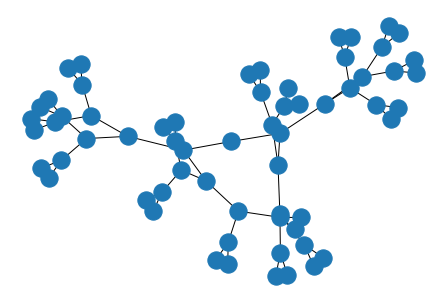

In [69]:
nx.draw(G)

In [70]:
G.number_of_nodes()

63

Another example:

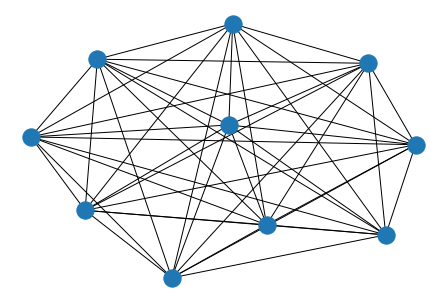

In [71]:
G2 = nx.complete_graph(10)
nx.draw(G2)

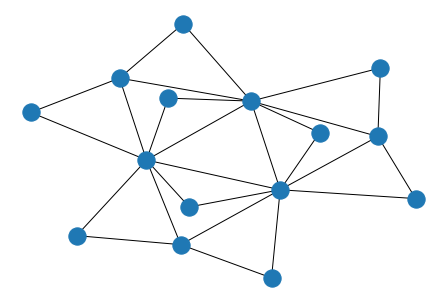

In [20]:
G3 = nx.dorogovtsev_goltsev_mendes_graph(3)
nx.draw(G3)

You can find more graph examples [here](https://networkx.org/documentation/stable/reference/generators.html).

Now let's go out on 10 random walks for each node of G:

In [72]:
import random 

def get_random_walk(graph:nx.Graph, node:int, n_steps:int = 4):
   """ Given a graph and a node, 
       return a random walk starting from the node 
   """
   local_path = [str(node),]
   target_node = node
   for _ in range(n_steps):
      neighbors = list(nx.all_neighbors(graph, target_node))
      target_node = random.choice(neighbors)
      local_path.append(str(target_node))
   return local_path

walk_paths = []
for node in G.nodes():
   for _ in range(10):
      walk_paths.append(get_random_walk(G, node))
        
walk_paths

[['0', '2', '6', '14', '6'],
 ['0', '2', '0', '1', '4'],
 ['0', '1', '4', '10', '22'],
 ['0', '2', '0', '2', '0'],
 ['0', '1', '0', '1', '4'],
 ['0', '2', '5', '2', '6'],
 ['0', '1', '0', '1', '3'],
 ['0', '2', '5', '12', '5'],
 ['0', '2', '6', '2', '5'],
 ['0', '2', '5', '12', '5'],
 ['1', '0', '2', '6', '14'],
 ['1', '4', '9', '20', '41'],
 ['1', '0', '2', '6', '13'],
 ['1', '0', '2', '0', '2'],
 ['1', '3', '1', '0', '2'],
 ['1', '4', '10', '22', '45'],
 ['1', '4', '10', '4', '9'],
 ['1', '3', '1', '3', '1'],
 ['1', '3', '7', '3', '8'],
 ['1', '4', '9', '20', '42'],
 ['2', '5', '12', '26', '53'],
 ['2', '6', '14', '29', '59'],
 ['2', '5', '11', '23', '47'],
 ['2', '0', '1', '4', '1'],
 ['2', '0', '2', '6', '13'],
 ['2', '5', '2', '0', '1'],
 ['2', '5', '12', '5', '12'],
 ['2', '5', '11', '24', '50'],
 ['2', '0', '1', '0', '2'],
 ['2', '6', '2', '5', '11'],
 ['3', '8', '3', '1', '3'],
 ['3', '7', '15', '7', '15'],
 ['3', '8', '3', '1', '3'],
 ['3', '8', '3', '1', '3'],
 ['3', '1', '0'

What these random walks provide us is a series of strings that act as a path from the start node — randomly walking from one node to the next down the list. 

Now let's repeat this process with a real sentence:

In [73]:
text = "Life is a beautiful journey that is meant to be embraced to the fullest every day. However, that doesn’t mean you always wake up ready to seize the day, and sometimes need a reminder that life is a great gift."
doc = nlp(text)
print(doc.to_json())

{'text': 'Life is a beautiful journey that is meant to be embraced to the fullest every day. However, that doesn’t mean you always wake up ready to seize the day, and sometimes need a reminder that life is a great gift.', 'ents': [{'start': 72, 'end': 81, 'label': 'DATE'}, {'start': 144, 'end': 151, 'label': 'DATE'}], 'sents': [{'start': 0, 'end': 82}, {'start': 83, 'end': 209}], 'tokens': [{'id': 0, 'start': 0, 'end': 4, 'pos': 'NOUN', 'tag': 'NN', 'dep': 'nsubj', 'head': 1}, {'id': 1, 'start': 5, 'end': 7, 'pos': 'AUX', 'tag': 'VBZ', 'dep': 'ROOT', 'head': 1}, {'id': 2, 'start': 8, 'end': 9, 'pos': 'DET', 'tag': 'DT', 'dep': 'det', 'head': 4}, {'id': 3, 'start': 10, 'end': 19, 'pos': 'ADJ', 'tag': 'JJ', 'dep': 'amod', 'head': 4}, {'id': 4, 'start': 20, 'end': 27, 'pos': 'NOUN', 'tag': 'NN', 'dep': 'attr', 'head': 1}, {'id': 5, 'start': 28, 'end': 32, 'pos': 'DET', 'tag': 'WDT', 'dep': 'nsubjpass', 'head': 7}, {'id': 6, 'start': 33, 'end': 35, 'pos': 'AUX', 'tag': 'VBZ', 'dep': 'auxpa

Let's Load spacy’s dependency tree into a networkx graph:
```
pip install networkx
```

Here are the graph's edges, what the backend team uses the `zss` library for:

In [74]:
edges = []
for token in doc:
    for child in token.children:
        edges.append(('{0}'.format(token.lower_),
                      '{0}'.format(child.lower_)))

In [75]:
edges

[('is', 'life'),
 ('is', 'journey'),
 ('is', '.'),
 ('journey', 'a'),
 ('journey', 'beautiful'),
 ('journey', 'meant'),
 ('meant', 'that'),
 ('meant', 'is'),
 ('meant', 'embraced'),
 ('embraced', 'to'),
 ('embraced', 'be'),
 ('embraced', 'to'),
 ('embraced', 'day'),
 ('to', 'fullest'),
 ('fullest', 'the'),
 ('day', 'every'),
 ('mean', 'however'),
 ('mean', ','),
 ('mean', 'that'),
 ('mean', 'does'),
 ('mean', 'n’t'),
 ('mean', 'wake'),
 ('mean', '.'),
 ('wake', 'you'),
 ('wake', 'always'),
 ('wake', 'up'),
 ('wake', 'ready'),
 ('wake', ','),
 ('wake', 'and'),
 ('wake', 'need'),
 ('ready', 'seize'),
 ('seize', 'to'),
 ('seize', 'day'),
 ('day', 'the'),
 ('need', 'sometimes'),
 ('need', 'reminder'),
 ('reminder', 'a'),
 ('reminder', 'is'),
 ('is', 'that'),
 ('is', 'life'),
 ('is', 'gift'),
 ('gift', 'a'),
 ('gift', 'great')]

In [76]:
Gdt = nx.Graph(edges)

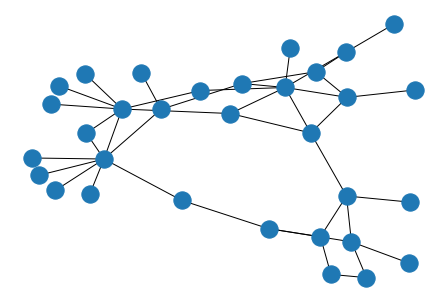

In [77]:
nx.draw(Gdt)

So our syntax dependency tree really looks like a balanced tree!

By the way, [Deep Graph Library](https://www.dgl.ai/) (DGL) is a framework-neutral, easy-to-use, and scalable Python library used for implementing and training Graph Neural Networks (GNN). We should prototype with it one day!
```
g = dgl.DGLGraph()
g.from_networkx(graph)
```

In [37]:
def plot_tree(g):
    pos = nx.nx_agraph.graphviz_layout(g, prog='dot')
    nx.draw(g, pos, with_labels=False, node_size=10,
            node_color=[[.5, .5, .5]], arrowsize=4)
    plt.show()
    
plot_tree(Gdt)

ImportError: ('requires pygraphviz ', 'http://pygraphviz.github.io/')

Now, let's walk our `Gdt` graph:

In [78]:
walk_paths = []
for node in Gdt.nodes():
   for _ in range(10):
      walk_paths.append(get_random_walk(Gdt, node))
        
walk_paths

[['is', 'journey', 'beautiful', 'journey', 'beautiful'],
 ['is', 'gift', 'great', 'gift', 'is'],
 ['is', 'gift', 'great', 'gift', 'great'],
 ['is', 'life', 'is', 'journey', 'is'],
 ['is', 'gift', 'great', 'gift', 'great'],
 ['is', 'that', 'is', 'gift', 'a'],
 ['is', 'life', 'is', '.', 'is'],
 ['is', 'life', 'is', '.', 'mean'],
 ['is', 'gift', 'is', 'reminder', 'is'],
 ['is', 'journey', 'beautiful', 'journey', 'meant'],
 ['life', 'is', 'gift', 'great', 'gift'],
 ['life', 'is', 'gift', 'is', 'that'],
 ['life', 'is', 'journey', 'meant', 'that'],
 ['life', 'is', 'gift', 'great', 'gift'],
 ['life', 'is', 'life', 'is', 'journey'],
 ['life', 'is', 'reminder', 'need', 'wake'],
 ['life', 'is', 'meant', 'that', 'mean'],
 ['life', 'is', 'meant', 'journey', 'a'],
 ['life', 'is', 'life', 'is', 'that'],
 ['life', 'is', '.', 'is', 'life'],
 ['journey', 'is', 'that', 'is', 'meant'],
 ['journey', 'beautiful', 'journey', 'a', 'reminder'],
 ['journey', 'is', 'meant', 'that', 'meant'],
 ['journey', 'is', 

What we do next is we treat these lists of strings as sentences, then utilize these series of strings to train a Word2Vec model:
```
pip install gensim
```

In [79]:
import gensim as gs

#import gensim.models
#sentences = MyCorpus()
#model = gensim.models.Word2Vec(sentences=sentences)

# Instantiate word2vec model
embedder = gs.models.Word2Vec(
   window=4, sg=1, hs=0, negative=10, alpha=0.03, min_alpha=0.0001,    
   seed=42
)

In [80]:
# Build Vocabulary
embedder.build_vocab(walk_paths, progress_per=2)

In [81]:
# Train
embedder.train(
   walk_paths, total_examples=embedder.corpus_count, epochs=20, 
   report_delay=1
)

(6654, 32000)

The trained word vectors are stored in a KeyedVectors instance, as `model.wv`:

In [83]:
vector = embedder.wv['journey']  # get numpy vector of a word
vector

array([ 7.78488144e-02,  1.11302203e-02, -1.96144506e-01, -3.73516057e-04,
       -1.43209293e-01,  1.75821438e-01, -1.00669153e-01,  2.99831837e-01,
       -2.08503395e-01,  1.24599434e-01,  1.40366843e-02,  3.07773679e-01,
        5.08663468e-02,  2.57226173e-03,  5.86614273e-02, -4.80998009e-02,
       -2.02736139e-01, -1.91672161e-01,  1.99413911e-01,  9.48941056e-03,
        1.96362138e-01,  1.46340579e-01,  3.03328067e-01,  2.95356121e-02,
       -3.87209170e-02, -1.66106537e-01,  1.23073131e-01, -2.30956018e-01,
        3.41198146e-01,  2.51559228e-01,  9.04020369e-02, -4.10179757e-02,
        1.56106666e-01, -2.19163612e-01,  3.60981263e-02,  1.15907870e-01,
        1.16590485e-01, -7.90010393e-02,  1.10613115e-01,  9.90859419e-02,
       -9.49917361e-02,  2.61545908e-02, -1.18630223e-01,  4.77116853e-02,
        2.40795538e-01, -1.70439422e-01, -1.59459144e-01, -5.37725613e-02,
       -2.07737321e-03, -4.89889942e-02,  9.51398537e-02, -1.83836281e-01,
       -5.25461733e-02,  

In [45]:
vector.shape

(100,)

In [48]:
text

'Life is a beautiful journey that is meant to be embraced to the fullest every day. However, that doesn’t mean you always wake up ready to seize the day, and sometimes need a reminder that life is a great gift.'

In [47]:
sims = embedder.wv.most_similar('journey', topn=10)  # get other similar words
sims

[('is', 0.9996013641357422),
 ('gift', 0.9995642304420471),
 ('beautiful', 0.9995521306991577),
 ('that', 0.9995238780975342),
 ('meant', 0.9995033740997314),
 ('a', 0.9994637370109558),
 ('great', 0.9994596242904663),
 ('life', 0.999431312084198),
 ('.', 0.9994122385978699),
 ('reminder', 0.999411940574646)]

And indeed, `reminder` is meant as a replacement to `journey` in our corpus (and so is `gift`, `beautiful`, and `life`)!

In [84]:
vector2 = embedder.wv['reminder'] 
vector2

array([ 0.08523814,  0.00669777, -0.18410069, -0.00792388, -0.13643168,
        0.17911454, -0.0879211 ,  0.28519428, -0.20240425,  0.11717642,
        0.0119487 ,  0.2894415 ,  0.05452685,  0.01145295,  0.05495064,
       -0.03891929, -0.19635318, -0.1843441 ,  0.19806114,  0.01472252,
        0.18362741,  0.14484538,  0.29661018,  0.03095117, -0.02710129,
       -0.16846368,  0.11026654, -0.22503233,  0.33640537,  0.2470466 ,
        0.08857347, -0.0434832 ,  0.14962181, -0.21155868,  0.03991435,
        0.1149494 ,  0.12031633, -0.07444841,  0.10311568,  0.09540988,
       -0.0936202 ,  0.02846018, -0.11522228,  0.04563295,  0.22689365,
       -0.15605474, -0.14416029, -0.03491969, -0.0024987 , -0.03578737,
        0.086165  , -0.18365744, -0.05577597,  0.21614344,  0.08342959,
       -0.19508854, -0.00679338,  0.03610394, -0.09424504, -0.03400315,
       -0.09214951, -0.30479646,  0.1930848 , -0.23050912,  0.07703371,
        0.39708033, -0.00472079, -0.12747724,  0.18757108,  0.18

In [85]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

#calculate Cosine Similarity python
result = dot(vector, vector2)/(norm(vector)*norm(vector2))
result

0.9990574

If we translate a sentence into POS tags, then this might be a way to compare an incoming sentence's POS tags with those of reference sentences.

>**Note**: But I'm not sure this kind of complexity may be needed, when we can use a simpler POS tag delta with the `zss` library..

Parametrizable aspects of the model:
- Number of random walks performed for the W2V training dat
- Depth of each walk taken from the node

The classification performance (in accuracy) of the classifier trained on the node vectors from our Word2Vec model using increasing numbers of random walks on the y-axis, and increasing random walk depth on the x-axis shows that accuracy increases as both parameters increase, but yields a diminishing rate of returns as they both increase upwards

Back to our raw data, the below takes forever, had to interrupt even though `edgelist.edgelist` is a small file!

In [ ]:
!deepwalk --input edgelist.edgelist --output embeddings.embeddings

In [ ]:
# Read the embeddings
embeddings = []
with open("embeddings.embeddings",'r') as f:
   embeddings = f.readlines()

# Remove first line
embeddings = embeddings[1:]
# Split strings into lists within a list 
embeddings = [embedding.split(' ')[1:] for embedding in embeddings] 

In [ ]:
# Convert into Pandas DataFrame
embeddings_df = pd.DataFrame(embeddings).astype('float')
# Average along the node axis
avg_embeddings = embeddings_df.mean()
avg_embeddings

0    -0.142274
1     0.180646
2    -0.079605
3     0.185364
4    -0.233515
        ...   
59   -0.020311
60    0.379276
61    0.302284
62    0.295764
63   -0.247467
Length: 64, dtype: float64

In [ ]:
def text_to_sentence_embedding(text):
  edge_list = construct_edge_list(text_to_tree(text))

  with open("edgelist.edgelist",'w') as f:
    f.write(edge_list)

  !deepwalk --input edgelist.edgelist --output embeddings.embeddings --seed 19
  
  embeddings = []
  with open("embeddings.embeddings",'r') as f:
    embeddings = f.readlines()

  embeddings = embeddings[1:]
  embeddings = [embedding.split(' ')[1:] for embedding in embeddings] 

  embeddings_df = pd.DataFrame(embeddings).astype('float')
  avg_embeddings = embeddings_df.mean()
  return avg_embeddings

Calculate Cosine Similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def sent_to_cossim(sent1, sent2):
  embed1 = text_to_sentence_embedding(sent1)
  embed2 = text_to_sentence_embedding(sent2)

  cossim = cosine_similarity(embed1.values.reshape(1, -1), 
                             embed2.values.reshape(1, -1))
  
  return cossim

In [29]:
sent1 = "I would like a cup of tea"
sent2 = "I would like a bottle of wine"
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 21:47:02 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 21:47:03 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[1.]])

In [30]:
sent1 = "I would like a cup of tea"
sent2 = "I would also like a cup of tea"
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 21:47:21 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 17
Number of walks: 170
Data size (walks*length): 6800
Walking...
Training...
2022-05-05 21:47:22 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.80612144]])

In [ ]:
sent1 = "I would like a cup of tea"
sent2 = "I would also like a cup of tea too"
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 19:55:44 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 19
Number of walks: 190
Data size (walks*length): 7600
Walking...
Training...
2022-05-05 19:55:46 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.78044231]])

In [ ]:
sent1 = "I would like a cup of tea"
sent2 = "They all would very much like some blah blah blah ..."
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 19:55:49 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 19
Number of walks: 190
Data size (walks*length): 7600
Walking...
Training...
2022-05-05 19:55:51 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.69441488]])

In [ ]:
sent1 = "I would like a cup of tea"
sent2 = "I, wanting to quench my thirst, would also like a cup of tea"
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 15
Number of walks: 150
Data size (walks*length): 6000
Walking...
Training...
2022-05-05 19:55:56 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 30
Number of walks: 300
Data size (walks*length): 12000
Walking...
Training...


array([[0.56084036]])

In [ ]:
sent1 = "And since we've got no place to go, let it snow, let it snow, let it snow"
sent2 = "Read my lips: No new taxes"
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 46
Number of walks: 460
Data size (walks*length): 18400
Walking...
Training...
Number of nodes: 7
Number of walks: 70
Data size (walks*length): 2800
Walking...
Training...
2022-05-05 19:56:04 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.19108724]])

In [ ]:
sent1 = "."
sent2 = "This is 100% a real sentence ..."
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 2
Number of walks: 20
Data size (walks*length): 800
Walking...
Training...
2022-05-05 19:56:06 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 14
Number of walks: 140
Data size (walks*length): 5600
Walking...
Training...
2022-05-05 19:56:08 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.35010212]])

In [ ]:
sent1 = "."
sent2 = ", W(*#$&@#) :))))...¯\_(ツ)_/¯ "
sent_to_cossim(sent1, sent2)

/usr/local/lib/python3.7/dist-packages/torch/distributions/distribution.py:46: UserWarning: <class 'torch_struct.distributions.TreeCRF'> does not define `arg_constraints`. Please set `arg_constraints = {}` or initialize the distribution with `validate_args=False` to turn off validation.
  'with `validate_args=False` to turn off validation.')


Number of nodes: 2
Number of walks: 20
Data size (walks*length): 800
Walking...
Training...
2022-05-05 19:56:10 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay
Number of nodes: 11
Number of walks: 110
Data size (walks*length): 4400
Walking...
Training...
2022-05-05 19:56:13 WARNING base_any2vec.py: 1386 under 10 jobs per worker: consider setting a smaller `batch_words' for smoother alpha decay


array([[0.48226698]])

In [ ]:
import nltk
from nltk import word_tokenize
import numpy as np
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

pos_tag = {'CC': 0, 'CD': 0, 'DT': 0, 'EX': 0, 'FW': 0, 'IN': 0, 'JJ': 0, 'JJR': 0, 'JJS': 0, 'LS': 0, 'MD': 0,
           'NN': 0,
           'NNS': 0, 'NNP': 0, 'NNPS': 0, 'PDT': 0, 'POS': 0, 'PRP': 0, 'PRP$': 0, 'RB': 0, 'RBR': 0,
           'RBS': 0, 'RP': 0,
           'SYM': 0, 'TO': 0, 'UH': 0, 'VB': 0, 'VBD': 0, 'VBG': 0, 'VBN': 0, 'VBP': 0, 'VBZ': 0, 'WDT': 0,
           'WP': 0, 'WP$': 0,
           'WRB': 0}
text = word_tokenize("And now for something completely different")
pos_tag_list = []
for i in nltk.pos_tag(text):
  pos_tag[i[1]] += 1
print(pos_tag)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
{'CC': 1, 'CD': 0, 'DT': 0, 'EX': 0, 'FW': 0, 'IN': 1, 'JJ': 1, 'JJR': 0, 'JJS': 0, 'LS': 0, 'MD': 0, 'NN': 1, 'NNS': 0, 'NNP': 0, 'NNPS': 0, 'PDT': 0, 'POS': 0, 'PRP': 0, 'PRP$': 0, 'RB': 2, 'RBR': 0, 'RBS': 0, 'RP': 0, 'SYM': 0, 'TO': 0, 'UH': 0, 'VB': 0, 'VBD': 0, 'VBG': 0, 'VBN': 0, 'VBP': 0, 'VBZ': 0, 'WDT': 0, 'WP': 0, 'WP$': 0, 'WRB': 0}


# Conclusion
The backend team proposed an attractive solution for comparing the syntax of an incoming sentence with that of references sentences, by 
- converting words into tree-structured POS tags
- walking the resutling graph into short walks
- converting these walks into SkipGram-based embeddings
- Using these embeddings to compute a cosine similarity metric

I think it may be easier to use this strategy:
- Find the closest BERT semantic embeddings
- Then use POS tag edit distance to locate the best candidate